# Feature group and Preprocessing

We import the libraries we need to create our feature groups and analyze and treat our data:

In [43]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install cmake
#!pip install wheel setuptools --upgrade
#!pip3 install twofish
#!pip install hopsworks
import hopsworks
import pandas as pd

We connect with Hopsworks in order to save our feature groups there:

In [44]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193685
Connected. Call `.close()` to terminate connection gracefully.


We load the dataset and take a first look at it:

In [45]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [46]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [47]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [48]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Pre-processing
As we have seen in the previous steps, every variable is defined as float data types. We need to fix this as we have some variables which are actually integers.

We also define our target variable "quality" as a categorical variable of type string (i.e., "qualityCat") because we are going to use a classification model instead of a regression one.

Here we fix data types for every variable:

In [49]:
wine_df['fixed acidity'] = wine_df['fixed acidity'].astype(float)
wine_df['volatile acidity'] = wine_df['volatile acidity'].astype(float)
wine_df['citric acid'] = wine_df['citric acid'].astype(float)
wine_df['residual sugar'] = wine_df['residual sugar'].astype(float)
wine_df['chlorides'] = wine_df['chlorides'].astype(float)
wine_df['free sulfur dioxide'] = wine_df['free sulfur dioxide'].astype(int)
wine_df['total sulfur dioxide'] = wine_df['total sulfur dioxide'].astype(int)
wine_df['density'] = wine_df['density'].astype(float)
wine_df['pH'] = wine_df['pH'].astype(float)
wine_df['sulphates'] = wine_df['sulphates'].astype(float)
wine_df['alcohol'] = wine_df['alcohol'].astype(float)

wine_df['quality'] = wine_df['quality'].astype(int)
wine_df['qualityCat'] = pd.Categorical(wine_df['quality'], categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=True).astype(str)

In [50]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   int64  
 7   total sulfur dioxide  6497 non-null   int64  
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  qualityCat            6497 non-null   object 
dtypes: float64(9), int64(3), object(2)
memory usage: 710.7+ KB


Once we have corrected the datatypes, we need to check for missing values.

For floating variables the missing values are replaced by the mean value of the variable, while for integer variables, the missing values are replaced by the median value.

We also remove duplicates in order to have the most balanced data as possible.

In [51]:
for column in wine_df.columns:
    # Check if the column has float64 type
    if wine_df[column].dtype == 'float64':
        # Calculate the mean of the column
        mean_value = wine_df[column].mean()
        # Fill missing values with the mean
        wine_df[column].fillna(mean_value, inplace=True)
for column in wine_df.columns:
    # Check if the column has integer type
    if wine_df[column].dtype == 'int64':
        # Calculate the median of the column
        median_value = wine_df[column].median()
        # Fill missing values with the median
        wine_df[column].fillna(median_value, inplace=True)

wine_df = wine_df.drop_duplicates()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   int64  
 7   total sulfur dioxide  5329 non-null   int64  
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
 13  qualityCat            5329 non-null   object 
dtypes: float64(9), int64(3), object(2)
memory usage: 624.5+ KB


### Exploratory Data Analysis (EDA)  our Wine Data

Let's look at our wine dataset - the distribution and range of values for the different features and the target variable is `qualityCat`.

We first explore our target variable `qualityCat`:

We can see we have unbalanced data, where most of the target values correspond to a quality of level 6.
We are going to redefine our target variable by defining 2 different levels:
* Low quality (0): levels from 0 to 5
* High quality (1): levels from 6 to 10

We can see we now have much more balanced data in re

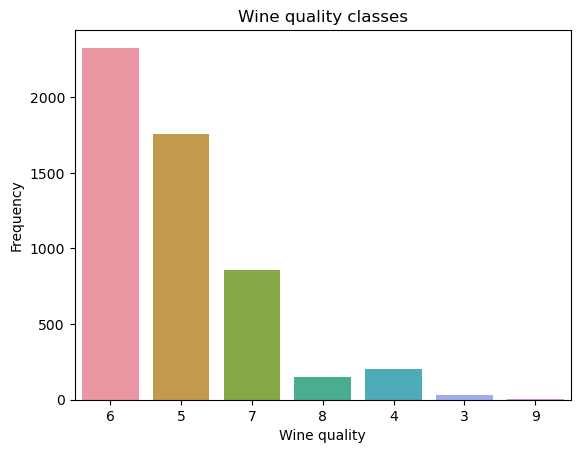

In [52]:
sns.countplot(x= wine_df['qualityCat'])
plt.xlabel('Wine quality')
plt.ylabel('Frequency')
plt.title('Wine quality classes');

In [63]:
wine_df['qualityBin'] = 0  
wine_df.loc[wine_df['quality'] > 5, 'qualityBin'] = 1
wine_df['qualityBin'] = pd.Categorical(wine_df['qualityBin'], categories=[0, 1], ordered=True).astype(str)

wine_df['qualityBin'].value_counts()

KeyError: 'quality'

We now check the correlation between the different features in order to get an idea of how variables could impact on the prediction of quality target.

We appreciate the most correlated variables with our target are:

- Alcohol
- Density (negative correlation)
- Volatile acidity (negative correlation)
- Chlorides (negative correlation)

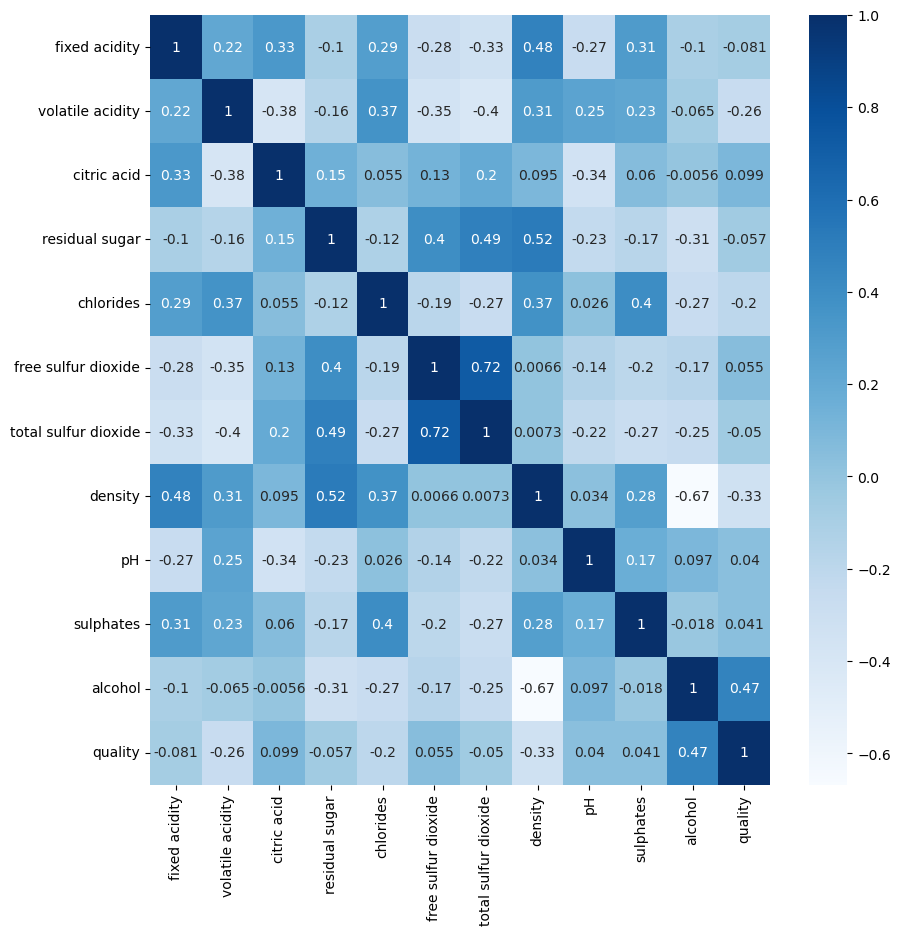

In [54]:
plt.figure(figsize=(10,10))
corr = wine_df.corr()
sns.heatmap(corr ,annot=True , cmap= 'Blues');

Here we can see a complete overview of our variable distribution and how thay can realate among the others.

Colors represent the high or low quality records.

Analyzing these graphs, the most noticeably distinguishing variable to separate between high and low quality appears to be alcohol content.

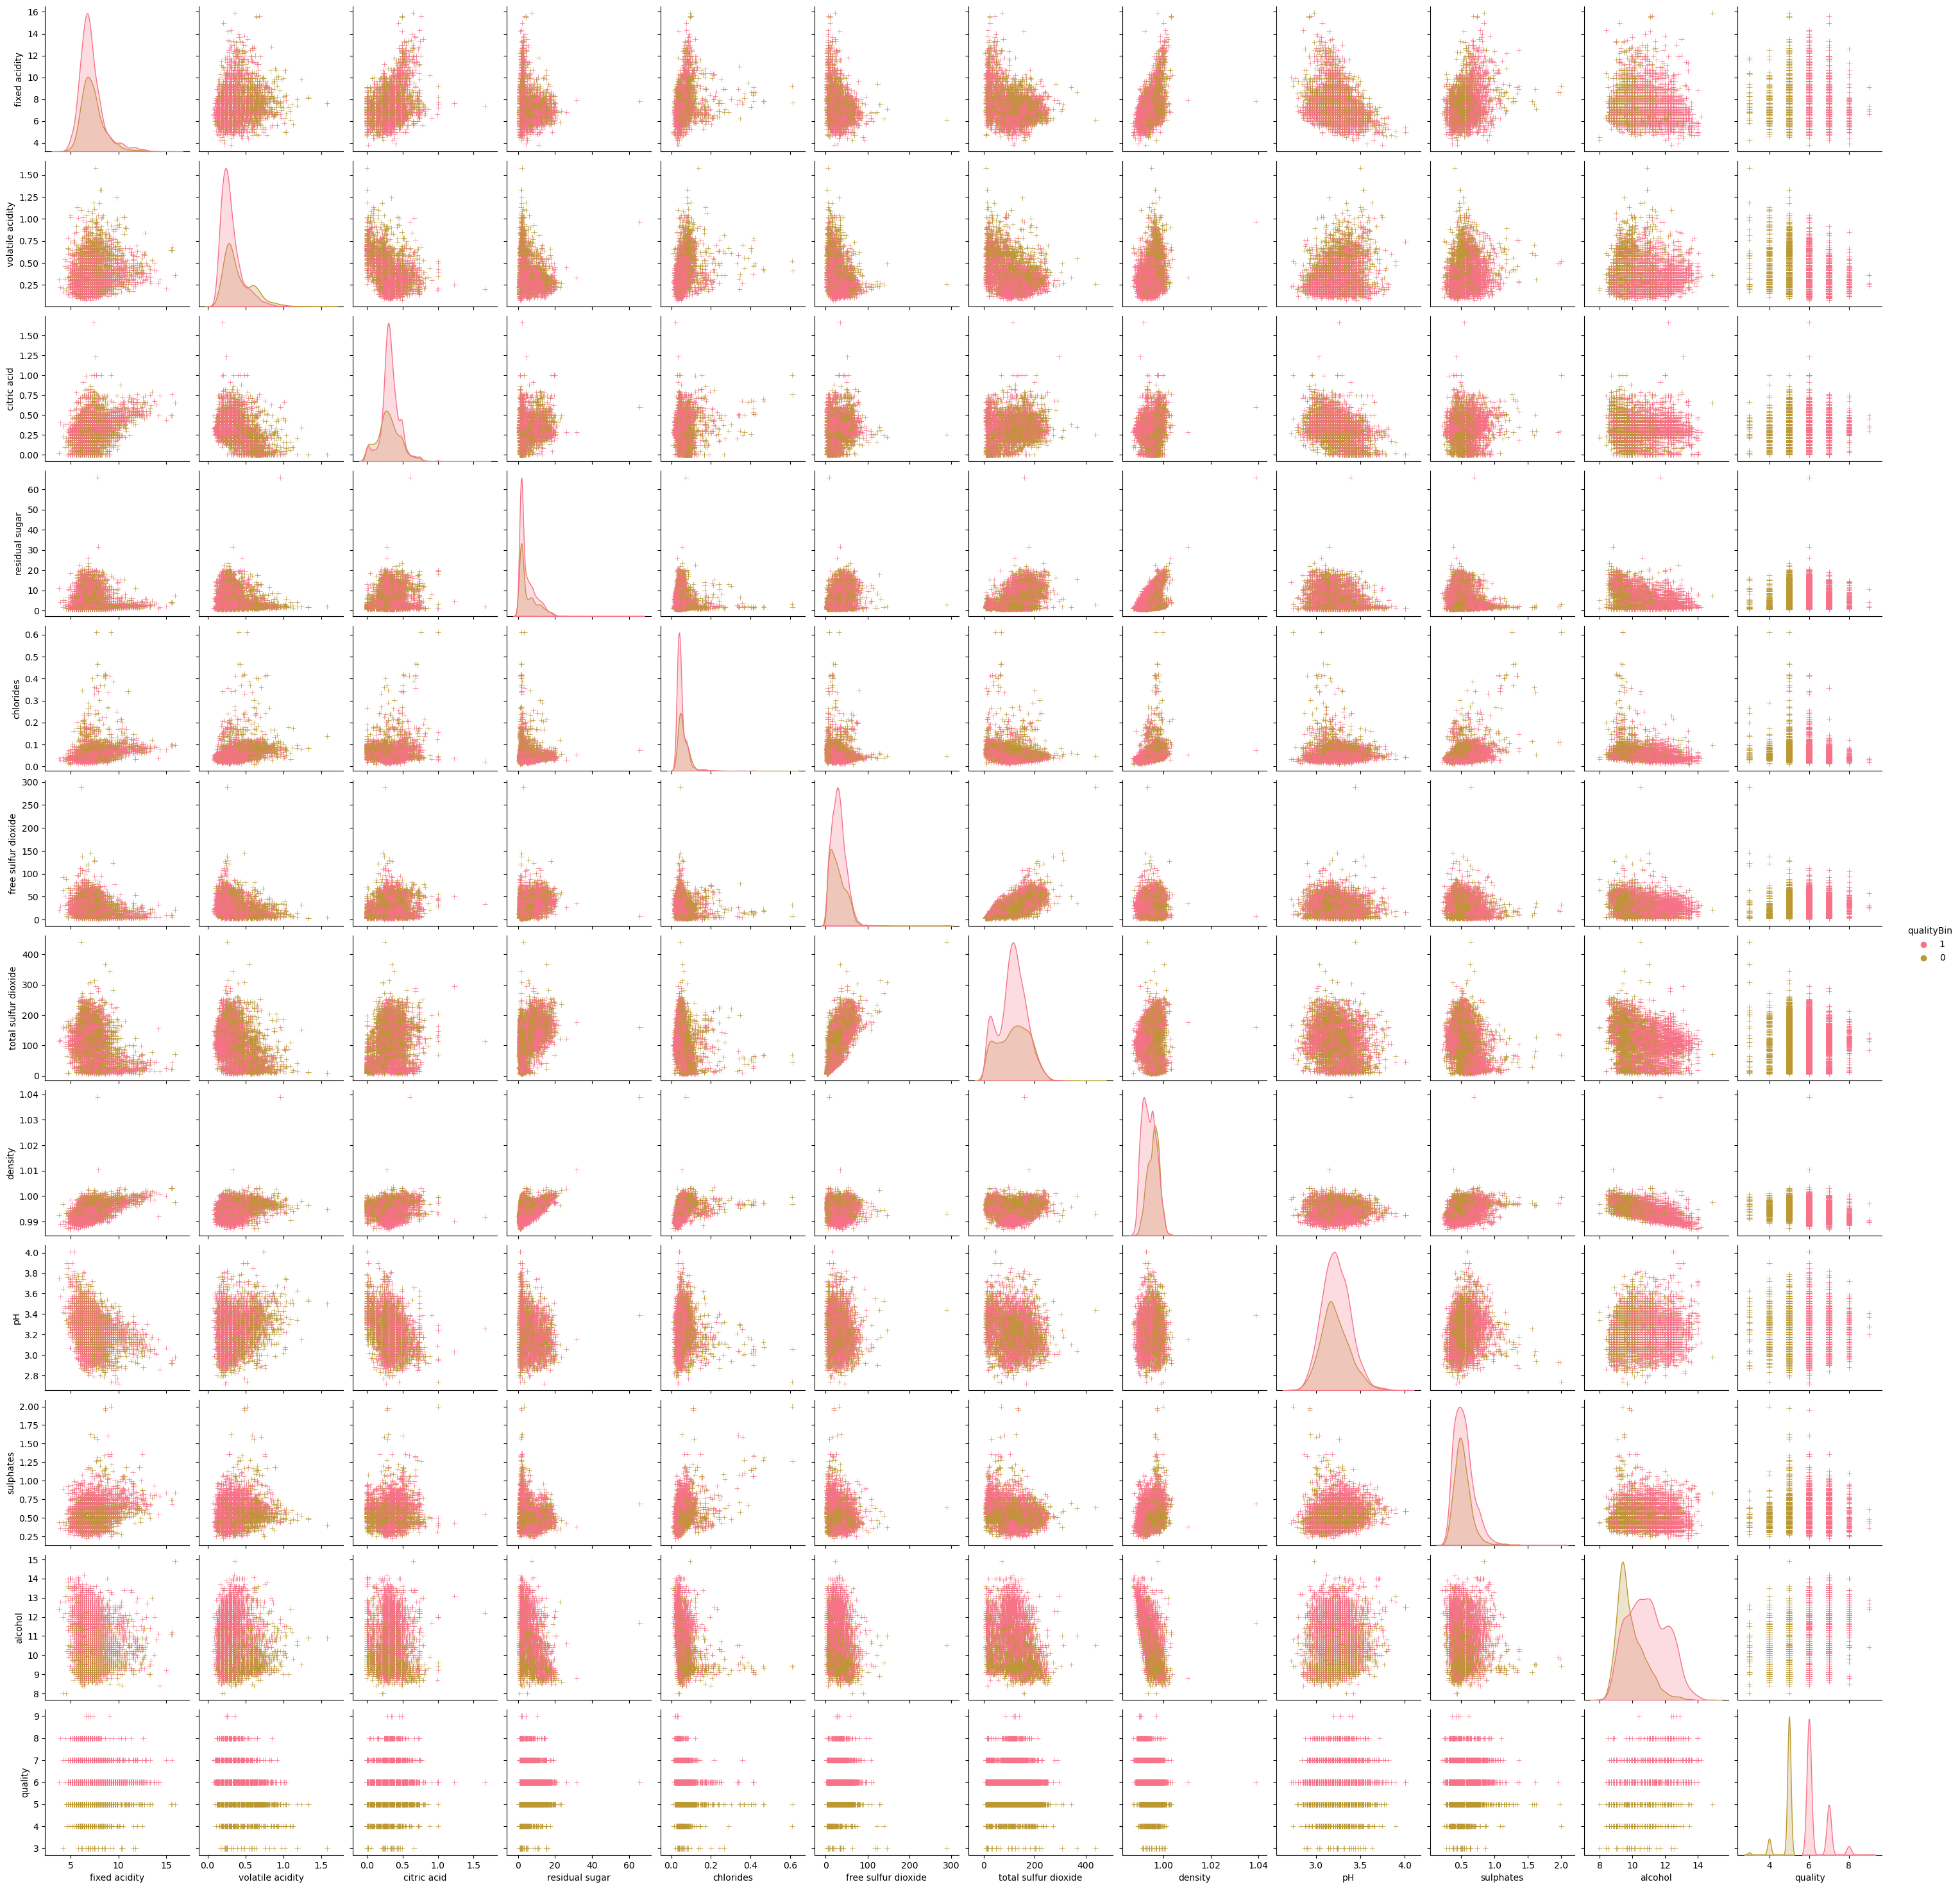

In [55]:
g = sns.pairplot(wine_df, hue='qualityBin', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 2 types of wine (high or low quality).
To do this, we can visualize the range of values for some of the variables for each of the 2 types of wine.

In order to not inspect all the different variables we just investigate the behaviour of the most important features according to the model trained in this article: https://labelyourdata.com/articles/machine-learning-for-wine-quality-prediction

The article reports that the most important features are:
- Alcohol
- Sulphates
- Volatile acidity
- Total sulfure dioxide

So we are going to limit our investigation to those variables.

Again, only `alcohol` variable seems to show differences on both types of wine.

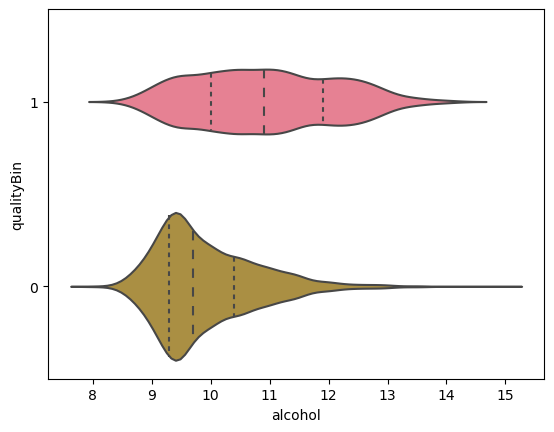

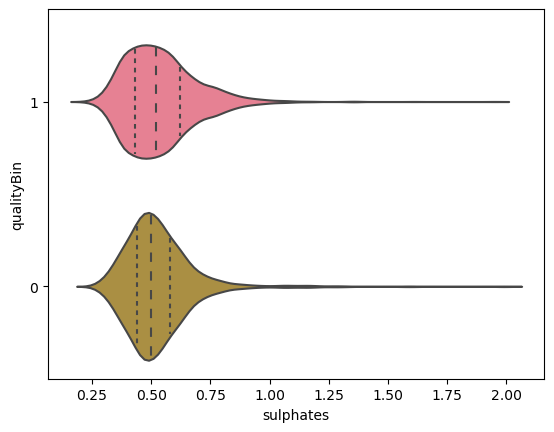

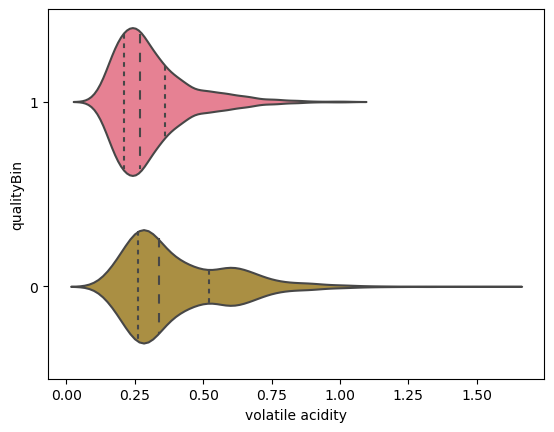

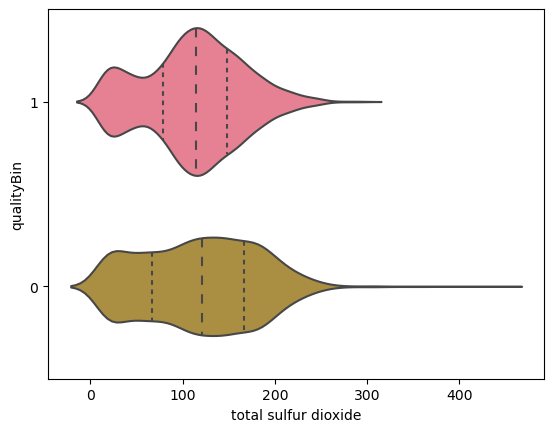

In [56]:
g = sns.violinplot(y='qualityBin', x='alcohol', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='qualityBin', x='sulphates', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='qualityBin', x='volatile acidity', data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(y='qualityBin', x='total sulfur dioxide', data=wine_df, inner='quartile')
plt.show()

### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group (`backfilling`).

In [57]:
selected_columns = ["alcohol", "sulphates", "volatile acidity", "total sulfur dioxide", "pH",
                    "density", "free sulfur dioxide", "chlorides", "residual sugar", "citric acid", "fixed acidity",
                    "qualityBin"]

wine_df = wine_df[selected_columns]
wine_df = wine_df.rename(columns={'volatile acidity': 'volatile_acidity', 
                                  'total sulfur dioxide': 'total_sulfur_dioxide',
                                  'free sulfur dioxide': 'free_sulfur_dioxide',
                                  'residual sugar': 'residual_sugar',
                                  'citric acid': 'citric_acid',
                                  'fixed acidity': 'fixed_acidity'
                                 })
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               5329 non-null   float64
 1   sulphates             5329 non-null   float64
 2   volatile_acidity      5329 non-null   float64
 3   total_sulfur_dioxide  5329 non-null   int64  
 4   pH                    5329 non-null   float64
 5   density               5329 non-null   float64
 6   free_sulfur_dioxide   5329 non-null   int64  
 7   chlorides             5329 non-null   float64
 8   residual_sugar        5329 non-null   float64
 9   citric_acid           5329 non-null   float64
 10  fixed_acidity         5329 non-null   float64
 11  qualityBin            5329 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 541.2+ KB


In [58]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["alcohol", "sulphates", "volatile_acidity", "total_sulfur_dioxide", "pH",
                 "density", "free_sulfur_dioxide", "chlorides", "residual_sugar", "citric_acid", "fixed_acidity"], 
    description="Wine dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/193685/fs/193604/fg/240006


Uploading Dataframe: 0.00% |          | Rows 0/5329 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193685/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1361f7c10>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [59]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [60]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")



expect(suite, "alcohol", wine_df["alcohol"].min(), wine_df["alcohol"].max())
expect(suite, "sulphates", wine_df["sulphates"].min(), wine_df["sulphates"].max())
expect(suite, "volatile_acidity", wine_df["volatile_acidity"].min(), wine_df["volatile_acidity"].max())
expect(suite, "total_sulfur_dioxide", wine_df["total_sulfur_dioxide"].min(), wine_df["total_sulfur_dioxide"].max())
expect(suite, "ph", wine_df["pH"].min(), wine_df["pH"].max())
expect(suite, "density", wine_df["density"].min(), wine_df["density"].max())
expect(suite, "free_sulfur_dioxide", wine_df["free_sulfur_dioxide"].min(), wine_df["free_sulfur_dioxide"].max())
expect(suite, "chlorides", wine_df["chlorides"].min(), wine_df["chlorides"].max())
expect(suite, "residual_sugar", wine_df["residual_sugar"].min(), wine_df["residual_sugar"].max())
expect(suite, "citric_acid", wine_df["citric_acid"].min(), wine_df["citric_acid"].max())
expect(suite, "fixed_acidity", wine_df["fixed_acidity"].min(), wine_df["fixed_acidity"].max())

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/193685/fs/193604/fg/240006


In [62]:
wine_df.describe()
wine_df['qualityBin'].value_counts()

1    3338
0    1991
Name: qualityBin, dtype: int64